### 🏥 고양이 의료 문서 분석

고양이 의료 문서 분석 단계

- 전처리 > PaddleOCR

### 1. 환경 설정 및 라이브러리 로드

In [ ]:
# 필요한 라이브러리 설치 (CPU 전용, 첫 실행 시만)
%pip install paddleocr paddlepaddle opencv-python pillow numpy pandas ipywidgets

In [6]:
def check_paddleocr_setup():
    """PaddleOCR 설치 및 모델 로드 확인 (CPU 전용)"""
    try:
        print("🔧 PaddleOCR 설치 확인 중... (CPU 모드)")
        
        # 필수 라이브러리 임포트 확인
        import cv2
        import numpy as np
        import PIL
        from PIL import Image
        
        print(f"✅ OpenCV 버전: {cv2.__version__}")
        print(f"✅ NumPy 버전: {np.__version__}")
        print(f"✅ Pillow 버전: {PIL.__version__}")
        
        # PaddleOCR 임포트 확인
        try:
            from paddleocr import PaddleOCR
            import paddle 
            print(f"✅ PaddlePaddle 버전: {paddle.__version__}")
            print("✅ PaddleOCR 임포트 성공")
        except ImportError as e:
            print(f"❌ PaddleOCR 임포트 실패: {e}")
            print("💡 다음 명령어로 설치하세요:")
            print("   %pip install --upgrade paddlepaddle paddleocr")
            return False
        
        # CPU 환경 설정
        print(f"🖥️ 사용 디바이스: CPU")
        
        # 모델 다운로드 및 초기화 테스트
        print("\n📥 PaddleOCR 모델 다운로드 테스트... (시간이 걸릴 수 있습니다)")
        
        # 1. 영어 모델 (기본) - API 3.2.0 호환
        try:
            print("   영어 모델 로드 중...")
            ocr_en = PaddleOCR(use_textline_orientation=True, lang='en')
            print("✅ 영어 모델 로드 성공")
        except Exception as e:
            print(f"❌ 영어 모델 로드 실패: {e}")
            return False
        
        # 2. 중국어 모델 (한자 포함) - 의료 문서에 유용
        try:
            print("   중국어 모델 로드 중...")
            ocr_ch = PaddleOCR(use_textline_orientation=True, lang='ch')
            print("✅ 중국어 모델 로드 성공")
        except Exception as e:
            print(f"⚠️ 중국어 모델 로드 실패: {e}")
        
        # 간단한 테스트 이미지 생성 및 OCR 테스트
        print("\n🧪 OCR 기능 테스트...")
        try:
            # 테스트용 간단한 이미지 생성
            test_img = np.ones((100, 400, 3), dtype=np.uint8) * 255
            cv2.putText(test_img, "Hemoglobin 12.5 g/dL", (20, 50), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
            
            # OCR 실행 (3.2.0 API)
            result = ocr_en.predict(test_img)
            
            if result and len(result) > 0:
                print("✅ OCR 기능 테스트 성공")
                # 3.2.0 버전의 결과 구조에 맞게 수정
                for item in result:
                    if isinstance(item, dict):
                        text = item.get('text', '')
                        confidence = item.get('score', 0.0)
                        bbox = item.get('bbox', [])
                        print(f"   인식 결과: '{text}' (신뢰도: {confidence:.3f})")
                    elif isinstance(item, list) and len(item) >= 2:
                        bbox, (text, confidence) = item
                        print(f"   인식 결과: '{text}' (신뢰도: {confidence:.3f})")
            else:
                print("⚠️ OCR 결과가 비어있습니다")
                
        except Exception as e:
            print(f"❌ OCR 기능 테스트 실패: {e}")
        
        # 의료 문서에 유용한 언어 목록
        print("\n🌍 의료 문서 분석에 유용한 언어:")
        useful_langs = {
            'en': '영어 (기본)',
            'ch': '중국어 (한자 포함)',
            'korean': '한국어',
            'japan': '일본어'
        }
        for lang, desc in useful_langs.items():
            print(f"   • {lang}: {desc}")
        
        # CPU 성능 최적화 팁 (3.2.0 버전 기준)
        print("\n⚡ CPU 최적화 팁 (v3.2.0):")
        print("   • 이미지 크기를 적절히 조정하세요 (너무 크면 느려집니다)")
        print("   • use_textline_orientation=False로 설정하면 더 빨라집니다")
        print("   • 필요한 언어 모델만 로드하세요")
        print("   • predict() 메서드를 사용하세요 (ocr() 메서드는 deprecated)")
        
        # 메모리 사용량 확인
        try:
            import psutil
            process = psutil.Process()
            memory_mb = process.memory_info().rss / 1024 / 1024
            print(f"\n💾 현재 메모리 사용량: {memory_mb:.1f} MB")
        except ImportError:
            print("\n💾 메모리 사용량 확인을 위해 psutil 설치를 권장합니다: %pip install psutil")
        
        print("\n🎯 PaddleOCR CPU 설정 완료!")
        return True
        
    except ImportError as e:
        print(f"❌ 라이브러리 임포트 실패: {e}")
        print("💡 다음 명령어로 설치하세요:")
        print("   %pip install --upgrade paddlepaddle paddleocr")
        return False
    except Exception as e:
        print(f"❌ PaddleOCR 설정 오류: {e}")
        return False

check_paddleocr_setup()

🔧 PaddleOCR 설치 확인 중... (CPU 모드)
✅ OpenCV 버전: 4.10.0
✅ NumPy 버전: 2.2.6
✅ Pillow 버전: 11.3.0


/home/aidan/work/meow-chat/venv/lib/python3.10/site-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.


✅ PaddlePaddle 버전: 3.2.0
✅ PaddleOCR 임포트 성공
🖥️ 사용 디바이스: CPU

📥 PaddleOCR 모델 다운로드 테스트... (시간이 걸릴 수 있습니다)
   영어 모델 로드 중...


Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_model

✅ 영어 모델 로드 성공
   중국어 모델 로드 중...


Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-OCRv5_server_rec`.


✅ 중국어 모델 로드 성공

🧪 OCR 기능 테스트...
✅ OCR 기능 테스트 성공
   인식 결과: '' (신뢰도: 0.000)

🌍 의료 문서 분석에 유용한 언어:
   • en: 영어 (기본)
   • ch: 중국어 (한자 포함)
   • korean: 한국어
   • japan: 일본어

⚡ CPU 최적화 팁 (v3.2.0):
   • 이미지 크기를 적절히 조정하세요 (너무 크면 느려집니다)
   • use_textline_orientation=False로 설정하면 더 빨라집니다
   • 필요한 언어 모델만 로드하세요
   • predict() 메서드를 사용하세요 (ocr() 메서드는 deprecated)

💾 현재 메모리 사용량: 1478.6 MB

🎯 PaddleOCR CPU 설정 완료!


True

### 2. 업로드 파일 전처리

In [7]:
import io
from re import T
from typing import List, Dict, Any, Tuple, Callable, Sequence, Optional
import fitz
import tempfile
from PIL import Image, ImageFilter, ImageOps

import numpy as np
from pytesseract import image_to_data, Output
import cv2 

# 기존의 긴 전처리 함수 코드 대신 다음과 같이 간단히 임포트
from image_preprocessing import (
    # 공통 함수들
    pdf_to_images, open_with_exif, save_png_bytes, apply_pipeline,
    
    # 전처리 함수들
    flatten_transparency, auto_crop_with_margin, normalize_mode,
    upscale_min_resolution, illumination_flatten, suppress_glare,
    weak_autocontrast, apply_clahe, conservative_sharpen, to_grayscale,
    adaptive_binarize_for_ocr, enhance_table_lines, table_smart_crop,
    add_white_border, downscale_target_long_edge, ocr_quality_gate,
    
    # 고급 전처리 함수들 (필요시)
    detect_document_quad, perspective_unwarp, deskew_textlines,
    conditional_dewarp
)


In [8]:
def preprocess_for_paddleocr(
    img_bytes: bytes,
    # PaddleOCR 최적화 설정
    min_long_edge: int = 1000,  # PaddleOCR에 적합한 해상도
    target_long_edge: int = 2000,  # 최대 해상도 (너무 크면 느려짐)
    crop_margin: int = 12,  # 여백
    add_border: int = 8,  # 테두리
    
    # 기하학적 보정 (의료 문서용)
    enable_perspective_unwarp: bool = False,  # 투시 보정 활성화
    enable_deskew: bool = False,  # 기울기 보정 활성화
    
    # 화질 개선 (표 형태 문서용)
    enable_illumination_flatten: bool = True,  # 조명 평탄화
    enable_glare_suppress: bool = True,  # 빛반사 억제
    enable_table_enhancement: bool = True,  # 표 라인 강화
    enable_clahe: bool = True,  # 로컬 대비 향상
    
    # 텍스트 선명화
    enable_sharpen: bool = True,  # 샤프닝
    enable_binarize: bool = False,  # 이진화 (PaddleOCR에 효과적)
    binarize_block_size: int = 31,  # 적응형 이진화 윈도우 크기
    
    # 스마트 크롭 (테이블 영역만 추출)
    enable_table_crop: bool = True,  # 테이블 스마트 크롭
    
    # 디버그 모드
    debug: bool = False,
) -> bytes:
    """
    의료 문서용 PaddleOCR 최적화 전처리 파이프라인
    
    특징:
    - 표 형태 의료 문서에 특화
    - 한글/영문/숫자 혼합 텍스트 최적화
    - 바이오마커, 수치 데이터 인식 향상
    - 표 구조 보존
    
    Args:
        img_bytes: 입력 이미지 바이트
        기타: 각종 전처리 옵션들
        
    Returns:
        bytes: 전처리된 PNG 이미지 바이트
    """
    try:
        if debug:
            print("🏥 의료 문서용 PaddleOCR 전처리 시작")
        
        img = open_with_exif(img_bytes)
        original_size = img.size
        
        if debug:
            print(f"📏 원본 이미지 크기: {original_size}")
        
        steps = [
            # 1. 기본 정리 및 표준화
            (flatten_transparency, {}),
            (auto_crop_with_margin, dict(margin=crop_margin)),
            (normalize_mode, {}),
        ]
        
        # 2. 해상도 정규화 (PaddleOCR 최적화)
        steps.append((upscale_min_resolution, dict(min_long_edge=min_long_edge)))
        
        # 3. 기하학적 보정 (문서 정렬)
        if enable_perspective_unwarp:
            steps.append((perspective_unwarp, dict(
                quad=None, 
                keep_aspect=True, 
                padding=15, 
                debug=debug
            )))
        
        if enable_deskew:
            steps.append((deskew_textlines, dict(
                max_angle=8.0,  # 의료 문서는 보통 잘 정렬됨
                refine=True,
                debug=debug
            )))
        
        # 4. 화질 개선 (조명/그림자 보정)
        if enable_illumination_flatten:
            steps.append((illumination_flatten, dict(
                blur_ratio=0.03, 
                debug=debug
            )))
        
        if enable_glare_suppress:
            steps.append((suppress_glare, dict(
                v_high=240,  # 빛반사 임계값
                s_low=30,
                debug=debug
            )))
        
        # 5. 표 구조 강화 (의료 문서 특화)
        if enable_table_enhancement:
            steps.append((enhance_table_lines, dict(
                strength=0.4,  # 적당한 강도로 표 라인 강화
                debug=debug
            )))
        
        # 6. 스마트 테이블 크롭 (첫 번째 테이블만 추출)
        if enable_table_crop:
            steps.append((table_smart_crop, dict(
                enabled=True,
                lang="eng+kor",  # 한영 혼합 인식
                conf_min=25,  # 낮은 신뢰도까지 허용
                min_header_hits=1,  # 헤더 감지 완화
                gap_multiplier=3.0,  # 테이블 끝 감지 완화
                min_rows=3,  # 최소 행 수 완화
                debug=debug
            )))
        
        # 7. 대비 및 선명도 향상
        steps.append((weak_autocontrast, dict(cutoff=0.2)))  # 약한 자동 대비
        
        if enable_clahe:
            steps.append((apply_clahe, dict(
                clip_limit=2.5,  # 의료 문서용 적당한 대비
                tile_grid=(8, 8),
                enabled=True,
                debug=debug
            )))
        
        if enable_sharpen:
            steps.append((conservative_sharpen, dict(
                radius=1.0,
                percent=125,  # 적당한 샤프닝
                threshold=3,  # 노이즈 방지
                enabled=True
            )))
        
        # 8. 텍스트 최적화 (PaddleOCR 특화)
        if enable_binarize:
            steps.append((adaptive_binarize_for_ocr, dict(
                block_size=binarize_block_size,
                k=0.12,  # 의료 문서용 파라미터
                debug=debug
            )))
        
        # 9. 최종 정리
        steps.extend([
            (add_white_border, dict(border=add_border)),
            (downscale_target_long_edge, dict(target_long_edge=target_long_edge)),
        ])
        
        # 파이프라인 실행
        img = apply_pipeline(img, steps)
        
        if debug:
            final_size = img.size
            print(f"📐 최종 이미지 크기: {final_size}")
            print(f"🔄 크기 변화: {original_size} → {final_size}")
        
        # PNG로 저장 (PaddleOCR 호환성)
        result_bytes = save_png_bytes(img, compress_level=3)
        
        if debug:
            print(f"💾 결과 파일 크기: {len(result_bytes):,} bytes")
            print("✅ PaddleOCR 전처리 완료")
        
        return result_bytes
        
    except Exception as e:
        if debug:
            print(f"❌ 전처리 실패: {e}")
            import traceback
            traceback.print_exc()
        
        print(f"⚠️ 전처리 실패, 원본 반환: {e}")
        return img_bytes

# 의료 문서 특화 프리셋들
def get_medical_presets():
    """의료 문서 분석을 위한 다양한 프리셋 제공"""
    return {
        "high_quality": {
            "min_long_edge": 1200,
            "target_long_edge": 2400,
            "enable_clahe": True,
            "enable_sharpen": True,
            "enable_binarize": False,  # 고품질에서는 컬러 유지
            "debug": True
        },
        
        "fast_processing": {
            "min_long_edge": 800,
            "target_long_edge": 1600,
            "enable_perspective_unwarp": False,
            "enable_deskew": False,
            "enable_clahe": False,
            "debug": False
        },
        
        "table_focused": {
            "enable_table_crop": True,
            "enable_table_enhancement": True,
            "enable_binarize": True,
            "binarize_block_size": 25,
            "debug": True
        },
        
        "handwritten_notes": {
            "enable_illumination_flatten": True,
            "enable_glare_suppress": True,
            "enable_clahe": True,
            "enable_binarize": True,
            "binarize_block_size": 35,  # 손글씨용 큰 윈도우
            "debug": True
        }
    }

In [9]:
class UploadedFileManager:
    def __init__(self):
        # 업로드된 파일들이 저장되는 리스트
        # self.files 의 구조 예시:
        # [
        #     {
        #         "name": "blood_test1.png",       # 파일 이름 (str)
        #         "content": b"...",               # 원본 파일 내용 (bytes)
        #         "io": <_io.BytesIO object>       # BytesIO 객체 (PIL/OpenCV 사용 가능)
        #     },
        #     {
        #         "name": "blood_test2.jpg",
        #         "content": b"...",
        #         "io": <_io.BytesIO object>
        #     }
        # ]
        self.files: List[Dict[str, Any]] = []
    
    def _make_image_record(self, name: str, content: bytes) -> Dict[str, Any]:
        return {"name": name, "content": content, "io": io.BytesIO(content)}
    
    def handler(self, change) -> None:
        """
        ipywidgets FileUpload 위젯의 observe 이벤트 핸들러.

        Args:
            change (dict): ipywidgets 가 observe 이벤트에서 전달하는 dict
                change 의 구조 예시:
                {
                    'name': 'value',                # 변경된 속성 이름
                    'old': (),                      # 이전 값 (tuple of UploadedFile)
                    'new': (                        # 새로운 값 (tuple of UploadedFile)
                        UploadedFile(
                            name='blood_test1.png',
                            type='image/png',
                            size=12345,
                            content=b'...'
                        ),
                        UploadedFile(
                            name='blood_test2.jpg',
                            type='image/jpeg',
                            size=23456,
                            content=b'...'
                        )
                    ),
                    'owner': FileUpload(...)        # 이벤트를 발생시킨 위젯 객체
                }

        Returns:
            None: 반환값은 없으며, self.files 에 업로드된 파일 리스트를 저장합니다.
        """
        try:
            if not change or "new" not in change or not change["new"]:
                self.files = []
                return

            uploaded = list(change["new"])  # tuple of UploadedFile → list 변환
            out: List[Dict[str, Any]] = []

            for f in uploaded:
                name = getattr(f, "name", "uploaded")
                raw_content: bytes = getattr(f, "content", b"")
                mime = getattr(f, "type", "").lower()

                if not raw_content:
                    continue

                is_pdf = name.lower().endswith(".pdf") or mime == "application/pdf"

                # content를 bytes[]로 표준화
                contents: List[bytes] = [raw_content]
                base = os.path.splitext(name)[0]

                if is_pdf:
                    tmp_path = None
                    try:
                        with tempfile.NamedTemporaryFile(suffix=".pdf", delete=False) as tmp:
                            tmp.write(raw_content)
                            tmp_path = tmp.name
                        # PDF → 페이지별 PNG 바이트 리스트
                        contents = pdf_to_images(tmp_path, resolution_scale=2.0)
                    except Exception as e:
                        print(f"❌ PDF 변환 실패({name}): {e}")
                        contents = []
                    finally:
                        if tmp_path and os.path.exists(tmp_path):
                            try:
                                os.remove(tmp_path)
                            except Exception:
                                pass

                # per-image 처리 → out.append
                for i, img_bytes in enumerate(contents, start=1):
                    processed_bytes = preprocess_image_bytes(img_bytes)
                    out_name = f"{base}_p{i:02d}.png" if is_pdf else name
                    
                    # 디버그 저장: 전처리된 이미지를 PNG로 저장
                    try:
                        save_name = out_name if out_name.lower().endswith(".png") else f"{os.path.splitext(out_name)[0]}.png"
                        out_path = os.path.join("debug_output", save_name)
                        with open(out_path, "wb") as fp:
                            fp.write(processed_bytes)
                    except Exception as e:
                        print(f"⚠️ 디버그 저장 실패({out_name}): {e}")

                    out.append(self._make_image_record(out_name, processed_bytes))

            self.files = out
            if self.files:
                print("✅ 업로드 완료:", [f["name"] for f in self.files])
            else:
                print("⚠️ 변환된 파일이 없습니다.")

        except Exception as e:
            print(f"❌ 파일 처리 오류: {e}")
            self.files = []

In [14]:
import time
import numpy as np
import cv2
from typing import Dict, List, Optional, Union, Tuple
from PIL import Image
import io

class PaddleOCRExtractor:
    """PaddleOCR을 이용한 텍스트 추출기 (최신 버전 호환)"""
    
    def __init__(self):
        self.ocr_models = {}  # 로드된 모델들을 캐시
        self.current_lang = None
        
    def load_model(self, lang: str = "ch", use_angle_cls: bool = True):
        """
        PaddleOCR 모델 로드 (최신 버전 호환)
        
        Args:
            lang: 언어 설정
                - "ch": 중국어 (한자 포함, 의료 문서에 유용)
                - "en": 영어
                - "korean": 한국어 (지원되는 경우)
                - "japan": 일본어
            use_angle_cls: 텍스트 방향 분류 사용 여부
        """
        model_key = f"{lang}_{use_angle_cls}"
        
        if model_key in self.ocr_models:
            print(f"✅ 이미 로드된 모델: {lang}")
            self.current_lang = lang
            return self.ocr_models[model_key]
            
        print(f"📥 PaddleOCR 모델 로드 중: {lang}")
        start_time = time.time()
        
        try:
            from paddleocr import PaddleOCR
            
            # 최신 버전 호환 파라미터 (최소한의 파라미터만 사용)
            ocr_params = {
                'use_angle_cls': use_angle_cls,
                'lang': lang
            }
            
            # CPU 모드 강제 설정 (GPU가 없는 환경)
            try:
                import paddle
                paddle.set_device('cpu')
                print("🖥️ CPU 모드로 설정됨")
            except:
                print("🖥️ CPU 사용 (기본 설정)")
            
            ocr = PaddleOCR(**ocr_params)
            
            self.ocr_models[model_key] = ocr
            self.current_lang = lang
            
            load_time = time.time() - start_time
            print(f"✅ 모델 로드 완료 ({load_time:.1f}초)")
            
            return ocr
            
        except Exception as e:
            print(f"❌ 모델 로드 실패: {e}")
            raise
    
    def extract_text(
        self, 
        image_bytes: bytes,
        lang: str = "ch",
        use_angle_cls: bool = True,
        conf_threshold: float = 0.5,
        sort_results: bool = True
    ) -> Dict[str, Union[str, float, List]]:
        """
        이미지에서 텍스트 추출
        
        Args:
            image_bytes: 이미지 바이트 데이터
            lang: 언어 설정
            use_angle_cls: 텍스트 방향 분류 사용 여부
            conf_threshold: 신뢰도 임계값 (이 값 이하는 제외)
            sort_results: 결과를 y좌표 순으로 정렬할지 여부
            
        Returns:
            Dict containing:
                - text: 추출된 전체 텍스트 (줄바꿈 포함)
                - processing_time: 처리 시간(초)
                - lang_used: 사용된 언어
                - results: 상세 결과 (위치, 신뢰도 포함)
                - total_boxes: 감지된 텍스트 박스 수
        """
        # 모델 로드 (필요시에만)
        ocr = self.load_model(lang, use_angle_cls)
        
        start_time = time.time()
        
        try:
            # 이미지를 numpy array로 변환
            img_array = np.frombuffer(image_bytes, np.uint8)
            cv_img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
            
            if cv_img is None:
                raise ValueError("이미지 디코딩 실패")
            
            h, w = cv_img.shape[:2]
            print(f"🖼️ 이미지 크기: {w}x{h}")
            
            # PaddleOCR 실행 - 최신 버전 호환
            try:
                # 최신 버전: ocr() 메서드 사용, cls 파라미터는 별도 전달하지 않음
                ocr_result = ocr.ocr(cv_img)
            except Exception as e:
                print(f"⚠️ ocr() 메서드 실패, 다른 방법 시도: {e}")
                try:
                    # 대안 1: 파라미터 없이 실행
                    ocr_result = ocr(cv_img)
                except Exception as e2:
                    print(f"⚠️ 대안 방법도 실패: {e2}")
                    raise e
            
            processing_time = time.time() - start_time
            
            # 결과 파싱 및 정리
            parsed_results = self._parse_ocr_results(ocr_result, conf_threshold)
            
            # 정렬 (위에서 아래로)
            if sort_results and parsed_results:
                parsed_results.sort(key=lambda x: x['bbox'][1])  # y 좌표 기준 정렬
            
            # 전체 텍스트 생성 (줄바꿈 포함)
            full_text = self._combine_text_lines(parsed_results)
            
            result = {
                "text": full_text,
                "processing_time": processing_time,
                "lang_used": lang,
                "results": parsed_results,
                "total_boxes": len(parsed_results),
                "image_size": (w, h)
            }
            
            print(f"⏱️ 처리 시간: {processing_time:.2f}초")
            print(f"📦 감지된 텍스트 박스: {len(parsed_results)}개")
            print(f"📝 추출된 텍스트 길이: {len(full_text)}자")
            
            return result
            
        except Exception as e:
            print(f"❌ 텍스트 추출 실패: {e}")
            return {
                "text": "",
                "processing_time": time.time() - start_time,
                "lang_used": lang,
                "results": [],
                "total_boxes": 0,
                "error": str(e)
            }
    
    def _parse_ocr_results(self, ocr_result: List, conf_threshold: float = 0.5) -> List[Dict]:
        """OCR 결과를 파싱하여 표준화된 형태로 변환"""
        parsed = []
        
        # PaddleOCR 결과는 보통 중첩된 리스트 형태
        if isinstance(ocr_result, list) and len(ocr_result) > 0:
            # 첫 번째 요소가 리스트인 경우 (페이지별 결과)
            if isinstance(ocr_result[0], list):
                results_to_parse = ocr_result[0]
            else:
                results_to_parse = ocr_result
        else:
            results_to_parse = []
        
        for item in results_to_parse:
            try:
                # PaddleOCR 표준 형식: [bbox, (text, confidence)]
                if isinstance(item, list) and len(item) >= 2:
                    bbox, text_conf = item
                    
                    if isinstance(text_conf, (list, tuple)) and len(text_conf) >= 2:
                        text, confidence = text_conf[0].strip(), float(text_conf[1])
                    else:
                        continue
                elif isinstance(item, dict):
                    # 딕셔너리 형태인 경우
                    text = item.get('text', '').strip()
                    confidence = float(item.get('score', 0.0))
                    bbox = item.get('bbox', [])
                else:
                    continue
                
                # 신뢰도 필터링
                if confidence < conf_threshold:
                    continue
                
                # bbox 좌표 정리
                if bbox and len(bbox) >= 4:
                    if isinstance(bbox[0], (list, tuple)):
                        # [[x1,y1], [x2,y2], [x3,y3], [x4,y4]] 형태
                        x_coords = [point[0] for point in bbox]
                        y_coords = [point[1] for point in bbox]
                        x_min, x_max = min(x_coords), max(x_coords)
                        y_min, y_max = min(y_coords), max(y_coords)
                    else:
                        # [x1, y1, x2, y2] 형태
                        x_min, y_min = bbox[0], bbox[1]
                        x_max, y_max = bbox[2], bbox[3]
                    
                    parsed.append({
                        'text': text,
                        'confidence': confidence,
                        'bbox': (x_min, y_min, x_max, y_max),  # (x1, y1, x2, y2)
                        'bbox_points': bbox  # 원본 bbox 보존
                    })
                    
            except Exception as e:
                print(f"⚠️ 결과 파싱 오류: {e}")
                continue
        
        return parsed
    
    def _combine_text_lines(self, results: List[Dict]) -> str:
        """결과를 텍스트 라인으로 결합 (의료 문서 표 형태 고려)"""
        if not results:
            return ""
        
        # y 좌표로 그룹핑하여 라인 구성
        lines = []
        current_line = []
        current_y = None
        y_tolerance = 10  # 같은 라인으로 간주할 y 좌표 차이
        
        for result in results:
            y = result['bbox'][1]  # y1 좌표
            
            if current_y is None or abs(y - current_y) <= y_tolerance:
                # 같은 라인
                current_line.append(result)
                current_y = y if current_y is None else current_y
            else:
                # 새 라인 시작
                if current_line:
                    # 현재 라인을 x 좌표로 정렬하여 저장
                    current_line.sort(key=lambda x: x['bbox'][0])
                    line_text = ' '.join([item['text'] for item in current_line])
                    lines.append(line_text)
                
                current_line = [result]
                current_y = y
        
        # 마지막 라인 처리
        if current_line:
            current_line.sort(key=lambda x: x['bbox'][0])
            line_text = ' '.join([item['text'] for item in current_line])
            lines.append(line_text)
        
        return '\n'.join(lines)
    
    def extract_with_multiple_langs(
        self, 
        image_bytes: bytes,
        langs: List[str] = None
    ) -> Dict[str, Dict]:
        """
        여러 언어 모델로 텍스트 추출하여 비교
        """
        if langs is None:
            langs = ["ch", "en"]  # 의료 문서에 적합한 기본 언어들
        
        results = {}
        
        for lang in langs:
            print(f"\n🔄 언어 모델 테스트: {lang}")
            try:
                result = self.extract_text(image_bytes, lang=lang)
                results[lang] = result
                
                if result.get("text"):
                    preview = result['text'][:100].replace('\n', ' ')
                    print(f"📄 결과 미리보기: {preview}...")
                    print(f"📦 텍스트 박스: {result['total_boxes']}개")
                else:
                    print("❌ 텍스트 추출 실패")
                    
            except Exception as e:
                print(f"❌ {lang} 모델 실패: {e}")
                results[lang] = {"text": "", "error": str(e)}
        
        return results
    
    def get_detailed_results(self, image_bytes: bytes, lang: str = "ch") -> List[Dict]:
        """
        상세한 OCR 결과 반환 (위치, 신뢰도 포함)
        의료 문서 분석에서 특정 영역의 텍스트를 추출할 때 유용
        """
        result = self.extract_text(image_bytes, lang=lang)
        return result.get("results", [])

📂 전처리 및 OCR 테스트
🔹 기본 파일 사용: 20241107.jpg
📁 파일 경로: ../data/20241107.jpg
📋 파일 형식: JPG
🖼️ 이미지 파일 로드 중...
📏 원본 이미지 크기: 213,793 bytes

🔧 전처리 시작...
🏥 의료 문서용 PaddleOCR 전처리 시작
📏 원본 이미지 크기: (794, 1123)
[illumination_flatten] k=37 적용
[suppress_glare] 글레어 감쇠 적용
[enhance_table_lines] 라인 강화 완료
[table_smart_crop] 🚀 시작 - 이미지 크기: (845, 1200)
[table_smart_crop] 🖼️ 이미지 모드: RGB
[table_smart_crop] 📝 OCR 시작 (Tesseract)...
[table_smart_crop] 📊 OCR 완료 - 총 34개 텍스트 요소 감지
[table_smart_crop] 🔍 토큰 필터링 (최소 신뢰도: 25)...
[table_smart_crop] ✅ 유효한 토큰: 13개
[table_smart_crop] 📋 라인 그룹핑 시작...
[table_smart_crop] ✅ 라인 그룹핑 완료: 2개 라인
[table_smart_crop] 🔎 헤더 라인 검색 중...
[table_smart_crop] 📌 헤더 라인 발견: 0개
[table_smart_crop] 🧬 바이오마커 검색 중...
[table_smart_crop] 🔄 헤더 없음 - 바이오마커 앵커 사용
[table_smart_crop] ❌ 바이오마커도 없음 - 원본 반환
[apply_clahe] 적용 완료
📐 최종 이미지 크기: (861, 1216)
🔄 크기 변화: (794, 1123) → (861, 1216)
💾 결과 파일 크기: 657,464 bytes
✅ PaddleOCR 전처리 완료
📏 전처리된 이미지 크기: 657,464 bytes
💾 전처리 결과 저장: debug_output/preprocessed_20241107.png


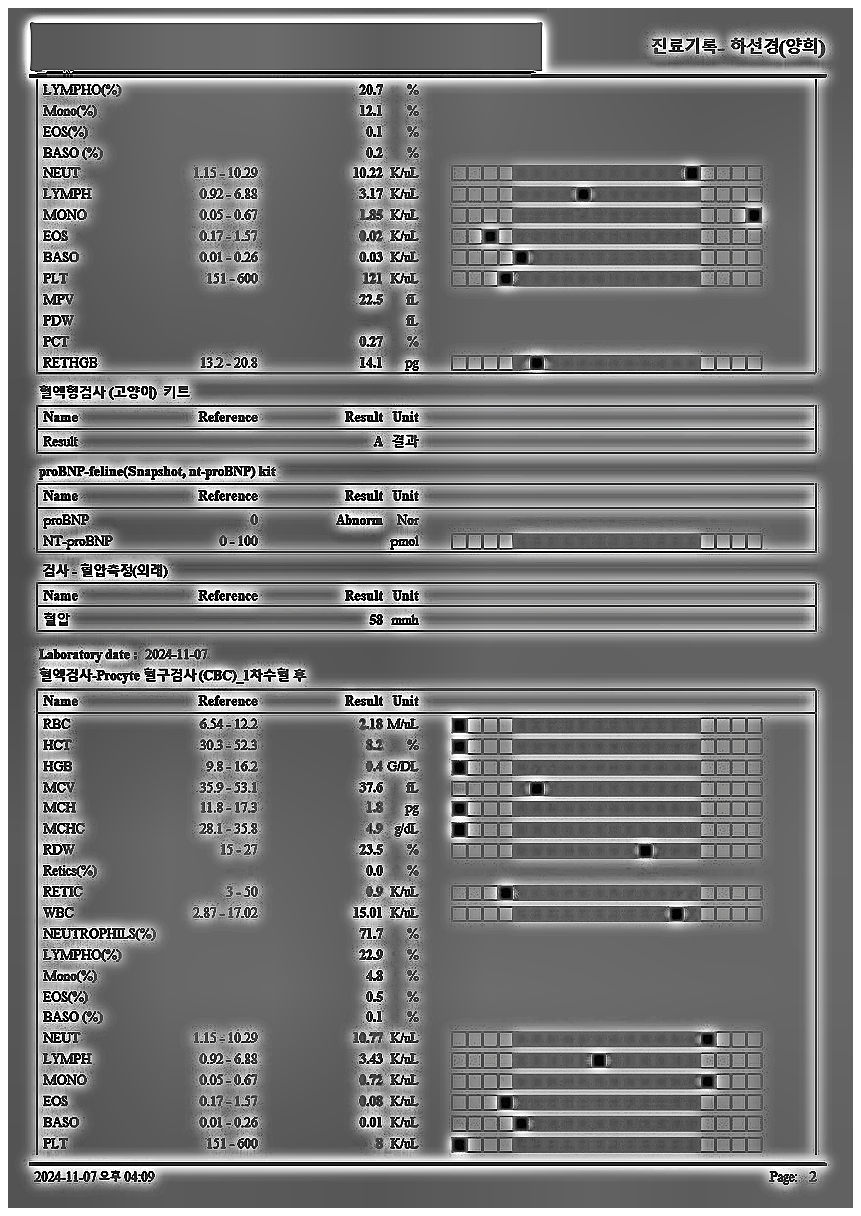

/tmp/ipykernel_19162/87053916.py:54: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(**ocr_params)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.



✅ 이미지 전처리 완료!

🔍 OCR 텍스트 추출 시작...

🔬 디버깅: PaddleOCR 테스트
📋 원본 이미지 + 중국어 모델:
📥 PaddleOCR 모델 로드 중: ch
🖥️ CPU 모드로 설정됨


Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/aidan/.paddlex/official_models/PP-OCRv5_server_rec`.


✅ 모델 로드 완료 (2.8초)
🖼️ 이미지 크기: 794x1123


/tmp/ipykernel_19162/87053916.py:113: DeprecationWarning: Please use `predict` instead.
  ocr_result = ocr.ocr(cv_img)


⏱️ 처리 시간: 74.61초
📦 감지된 텍스트 박스: 0개
📝 추출된 텍스트 길이: 0자
❌ OCR 텍스트 추출 실패

📋 전처리된 이미지 + 중국어 모델:
✅ 이미 로드된 모델: ch
🖼️ 이미지 크기: 861x1216
⏱️ 처리 시간: 77.42초
📦 감지된 텍스트 박스: 0개
📝 추출된 텍스트 길이: 0자
❌ 전처리된 이미지 OCR 실패


In [15]:
import os
import json

print("📂 전처리 및 OCR 테스트")
print("=" * 40)

# 사용자 입력 받기 (data/ 폴더 기본 경로)
filename = input("📄 data/ 폴더 내 파일명을 입력하세요: ").strip()

# 빈 입력 시 기본값 사용
if not filename:
    # filename = "20241121.png"
    filename = "20241107.jpg"
    # filename = "image.png"
    print(f"🔹 기본 파일 사용: {filename}")

# data/ 경로와 결합
file_path = f"../data/{filename}"
print(f"📁 파일 경로: {file_path}")

# 파일 확장자 확인
file_ext = filename.lower().split(".")[-1]
is_pdf = file_ext == "pdf"
is_image = file_ext in ["png", "jpg", "jpeg", "tiff", "bmp"]

print(f"📋 파일 형식: {file_ext.upper()}")

# 이미지 파일 처리
print("🖼️ 이미지 파일 로드 중...")

try:
    # 파일 읽기
    with open(file_path, "rb") as f:
        raw_image_bytes = f.read()

    print(f"📏 원본 이미지 크기: {len(raw_image_bytes):,} bytes")

    # 전처리 실행
    print("\n🔧 전처리 시작...")
    presets = get_medical_presets()
    processed_image_bytes = preprocess_for_paddleocr(raw_image_bytes, **presets["high_quality"])

    print(f"📏 전처리된 이미지 크기: {len(processed_image_bytes):,} bytes")

    # 전처리 결과 저장
    output_dir = "debug_output"
    os.makedirs(output_dir, exist_ok=True)

    output_filename = f"preprocessed_{os.path.splitext(filename)[0]}.png"
    output_path = os.path.join(output_dir, output_filename)

    with open(output_path, "wb") as f:
        f.write(processed_image_bytes)

    print(f"💾 전처리 결과 저장: {output_path}")

    # 전처리된 이미지 표시
    from IPython.display import display, Image as IPImage
    display(IPImage(processed_image_bytes))

    print(f"\n✅ 이미지 전처리 완료!")





    # OCR 실행 - 기본 모델만 사용하되 더 상세한 디버깅
    print("\n🔍 OCR 텍스트 추출 시작...")

    paddleocr_extractor = PaddleOCRExtractor()

    # PaddleOCR 테스트 (사용 가능한 경우)
    print("\n🔬 디버깅: PaddleOCR 테스트")
    print("=" * 50)

    # 1. 원본 이미지로 PaddleOCR 테스트 (중국어 모델)
    print("📋 원본 이미지 + 중국어 모델:")
    paddle_original_ch = paddleocr_extractor.extract_text(
        raw_image_bytes, 
        lang="ch", 
        conf_threshold=0.3
    )

    # 결과 출력
    if paddle_original_ch.get("text"):
        print(f"✅ OCR 텍스트 추출 성공:")
        print(f"📝 추출된 텍스트:\n{paddle_original_ch['text']}")
        print(f"📊 상세 정보:")
        print(f"   - 처리 시간: {paddle_original_ch['processing_time']:.2f}초")
        print(f"   - 텍스트 박스 수: {paddle_original_ch['total_boxes']}개")
        print(f"   - 사용 언어: {paddle_original_ch['lang_used']}")
    else:
        print("❌ OCR 텍스트 추출 실패")
        if "error" in paddle_original_ch:
            print(f"   오류: {paddle_original_ch['error']}")

    # 2. 전처리된 이미지로 PaddleOCR 테스트
    print("\n📋 전처리된 이미지 + 중국어 모델:")
    paddle_processed_ch = paddleocr_extractor.extract_text(
        processed_image_bytes, 
        lang="ch", 
        conf_threshold=0.3
    )

    # 결과 비교
    if paddle_processed_ch.get("text"):
        print(f"✅ 전처리된 이미지 OCR 성공:")
        print(f"📝 추출된 텍스트:\n{paddle_processed_ch['text']}")
        
        # 원본 vs 전처리 비교
        original_count = paddle_original_ch.get('total_boxes', 0)
        processed_count = paddle_processed_ch.get('total_boxes', 0)
        
        print(f"\n📊 원본 vs 전처리 비교:")
        print(f"   원본: {original_count}개 텍스트 박스")
        print(f"   전처리: {processed_count}개 텍스트 박스")
        print(f"   개선: {processed_count - original_count:+d}개")
    else:
        print("❌ 전처리된 이미지 OCR 실패")






except FileNotFoundError:
    print(f"❌ 파일을 찾을 수 없습니다: {file_path}")
except Exception as e:
    print(f"❌ 오류: {e}")
    import traceback
    traceback.print_exc()